In [4]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.height = 1
        


In [ ]:
# GET HEIGHT - HELPER FUNCTION

def get_height(rootnode):
    if not rootnode:
        return 0
    return rootnode.height

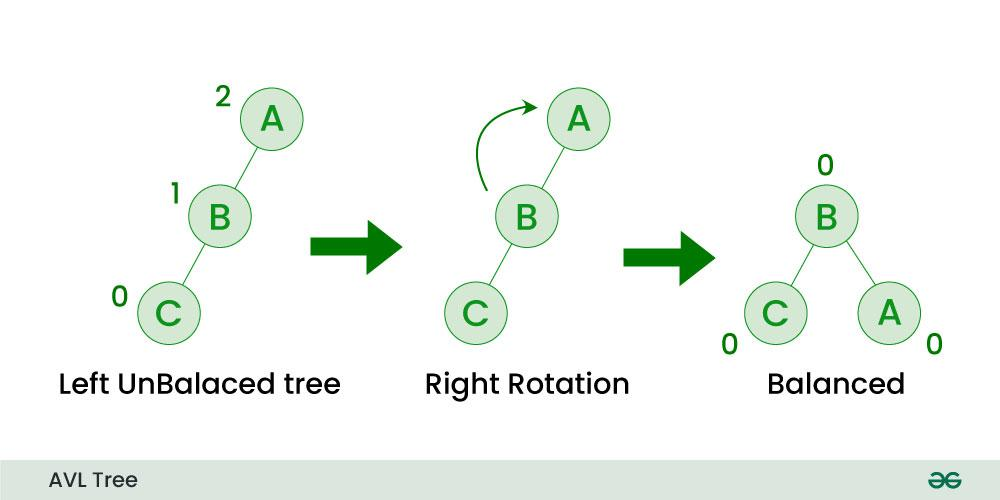

In [3]:
# RIGHT ROTATION - Algorithm of Left Left (LL) Condition

def right_rotate(unbalanced_node):
    new_root = unbalanced_node.left
    unbalanced_node.left = unbalanced_node.left.right
    new_root.right = unbalanced_node
    #update height and newroot
    #return newroot



In [ ]:
# LEFT ROTATION

def left_rotate(unbalance_node):
    pass